In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd

# Loading the data from the file into mat
mat = loadmat("Project Datasets/thyroidTrain.mat")

Xtrain = mat["trainThyroidInput"] # matrix of 30 rows and 400 features
print("Xtrain shape",Xtrain.shape)
n=len(Xtrain)
#print("Xtrain shape after reshape",Xtrain.shape)

ytrain = mat["trainThyroidOutput"] # matrix of 1 rows and 400 features
print("ytrain shape",ytrain.shape)
#ytrain = ytrain.reshape(n,1)
#print("ytrain shape after reshape",ytrain.shape)

print("Xtrain")
print(Xtrain[:5,:10])
print("ytrain")
print(ytrain[:10])

Xtrain shape (5000, 21)
ytrain shape (5000, 3)
Xtrain
[[0.28 0.   1.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.45 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.77 0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.72 0.   1.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.78 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
ytrain
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [2]:
#Standard scaling is done if the difference between features values is very high otherwise no need. (preprocessing)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalize = scaler.fit_transform(Xtrain)
print(X_normalize[:5,:5])

[[-1.26874056 -0.65247221  2.58238488 -0.12670299 -0.11742023]
 [-0.37366603 -0.65247221 -0.38723895 -0.12670299 -0.11742023]
 [ 1.31118015 -0.65247221 -0.38723895 -0.12670299 -0.11742023]
 [ 1.04792293 -0.65247221  2.58238488 -0.12670299  8.51642013]
 [ 1.36383159 -0.65247221 -0.38723895 -0.12670299 -0.11742023]]


(5000, 21)
(5000, 21)
(5000, 15)
(5000, 3)
[[ 4.55477319  5.21806316 -0.24523488  2.26488137 -1.64952538 -0.27412438
   1.71890352 -0.34008451  0.54738774 -0.08043276 -0.14551784 -1.7862431
  -2.90627541 -1.09368013  1.96273391]
 [ 0.7495773  -0.39911587 -0.09251564  0.31976948 -0.15722225 -0.20471434
  -0.34722434  0.02510616 -0.36484279 -0.25683727  0.13924859 -0.08117485
   0.17692515  0.33221063  0.19853391]
 [ 0.28198803 -0.08606015 -2.39097721 -1.40776682  1.12025047  0.19781871
   1.25019008  0.10339719  1.19969329  0.76884761 -0.66016853  2.57755209
  -1.72718988  2.13838478  0.78134124]
 [ 3.05985187  0.78756073 -1.98763914 -2.91659329  2.27837505  1.72288783
   0.10489038 -0.72984956 -3.29404766 -1.1918844   2.26544106  0.43578719
   1.07834194 -5.11917863  2.57524432]
 [-0.38089695 -1.27182866 -0.51012869  0.27701102  0.41540591 -0.42598061
  -0.29699106 -0.11717422 -0.02214763 -0.29209213  0.47396401 -0.30099304
   0.11156697  0.49656349  0.69543557]]
[[0 0 1]
 [0 0 1]
 [0 

<IPython.core.display.Javascript object>


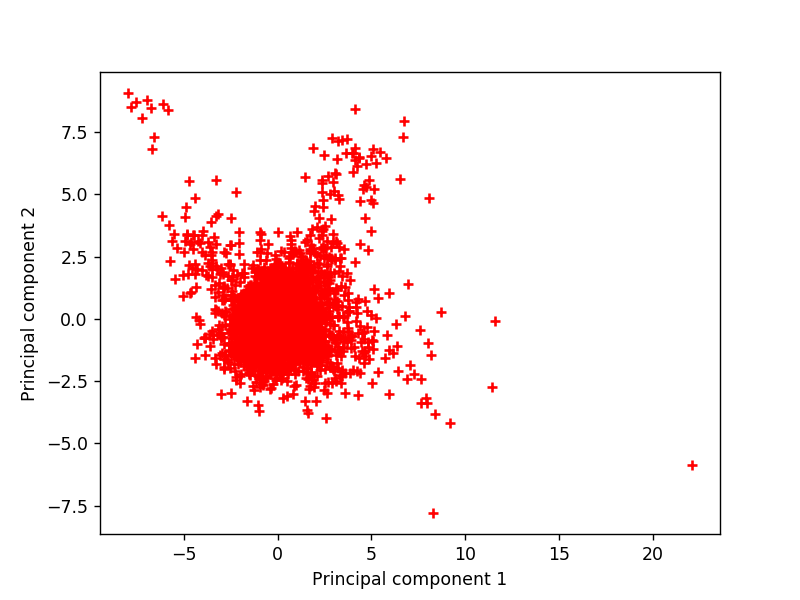

end


In [3]:
from sklearn.decomposition import PCA
pca =PCA(n_components=15) #n_components means the whole features are decomposed into 2 features
pca.fit(X_normalize)
Xtrain_pca=pca.transform(X_normalize)
print(X_normalize.shape)
print(Xtrain.shape)
print(Xtrain_pca.shape)
print(ytrain.shape)
print(Xtrain_pca[:5])
print(ytrain[:5])

print('Variance ratio corresponds to the data with PCA:')
print(pca.explained_variance_ratio_.sum())

fig, ax = plt.subplots()
ax.scatter(Xtrain_pca[:, 0], Xtrain_pca[:, 1], color="red", marker="+")
ax.set_xlabel("Principal component 1")
ax.set_ylabel("Principal component 2")
print("end")


In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain_pca, ytrain, test_size=1/3, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
ypredtrain = classifier.predict(Xtrain)
print(ypredtrain)
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,ypredtrain)

ypredval = classifier.predict(Xval)
print(ypredval)

from sklearn.metrics import accuracy_score
accuracy_score(yval,ypredval)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


0.9454109178164367

In [7]:
from sklearn.model_selection import GridSearchCV

#Hyper Parameters Set
n_neighbors = list(range(1,30))
params = {'n_neighbors':n_neighbors, 'weights':['uniform', 'distance'],}

#Making models with hyper parameters sets
model = GridSearchCV(classifier, param_grid=params, cv=4)

#Learning
model.fit(Xtrain,ytrain)

#The best hyper parameters set
print("Best Hyper Parameters with GridSearchCV:\n",model.best_params_)

#Prediction
ybestval=model.predict(Xval)
print(ybestval)

#importing the metrics module
from sklearn import metrics

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(yval,ybestval))

Best Hyper Parameters with GridSearchCV:
 {'n_neighbors': 4, 'weights': 'distance'}
[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
Accuracy: 0.943011397720456


In [8]:
# testing the test set reserved
testThyroidInput = mat["testThyroidInput"] # matrix of 5000 rows and 21 features
print("testThyroidInput shape",testThyroidInput.shape)

#Standard scaling is done if the difference between features values is very high otherwise no need. (preprocessing)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtest_normalize = scaler.fit_transform(testThyroidInput)
print(Xtest_normalize[:5,:5])

from sklearn.decomposition import PCA
pca =PCA(n_components=15) #n_components means the whole features are decomposed into 2 features
pca.fit(Xtest_normalize)
Xtest_pca=pca.transform(Xtest_normalize)
print(Xtest_normalize.shape)
print(Xtest_pca.shape)

#Prediction
testThyroidOutput=model.predict(Xtest_pca)
print(testThyroidOutput[:10])

testThyroidInput shape (2200, 21)
[[ 1.12142024 -0.68169914 -0.38810774 -0.12149135 -0.10502101]
 [ 0.42888374 -0.68169914 -0.38810774 -0.12149135 -0.10502101]
 [ 1.44105247  1.46692279 -0.38810774 -0.12149135 -0.10502101]
 [-1.38236558 -0.68169914 -0.38810774 -0.12149135 -0.10502101]
 [ 1.01487617 -0.68169914 -0.38810774 -0.12149135 -0.10502101]]
(2200, 21)
(2200, 15)
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


Cross Validation of dtata
{1: 0.9379025732319146, 2: 0.9007013001024976, 3: 0.944503785222348, 4: 0.9346001690313066, 5: 0.9457022891154627, 6: 0.9396989804175433, 7: 0.9441998885112659, 8: 0.9405989822157489, 9: 0.9430004855154556, 10: 0.9403013792235349, 11: 0.941502580424736, 12: 0.9394013774253296, 13: 0.9412022801244356, 14: 0.9400019780259301, 15: 0.9409019798241355, 16: 0.9391019762277247, 17: 0.9406016795238352, 18: 0.9391019762277247, 19: 0.9405998813184441, 20: 0.9394004783226342, 21: 0.9397007786229343, 22: 0.9394004783226342, 23: 0.9400001798205391, 24: 0.9378998759238281, 25: 0.9382001762241282, 26: 0.9376013738289186, 27: 0.9379007750265235, 28: 0.9370016723310137, 29: 0.9376013738289186, 30: 0.9370016723310137, 31: 0.937901674129219, 32: 0.9373019726313139, 33: 0.937901674129219, 34: 0.9376013738289186, 35: 0.9379007750265235, 36: 0.9369998741256225, 37: 0.9373001744259228, 38: 0.9370007732283181, 39: 0.9370007732283181, 40: 0.9370007732283181, 41: 0.9370007732283181, 42

<IPython.core.display.Javascript object>


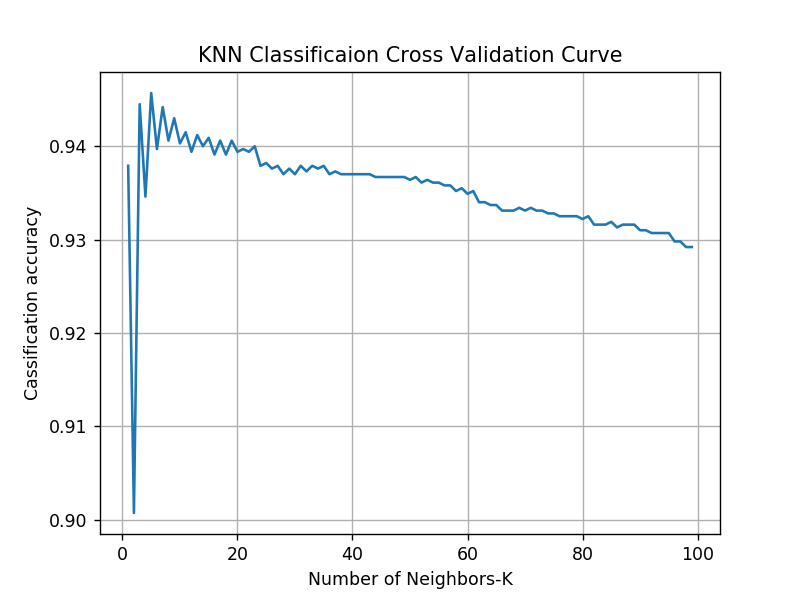

In [9]:
from sklearn.model_selection import cross_val_score
print ("Cross Validation of dtata")
k_values = list(range(1,100))
cv_scores ={}
# perform 10-fold cross validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,Xtrain, ytrain, cv=10, scoring='accuracy')
    cv_scores.update({k:(scores.mean())})
print(cv_scores)

MCE = [1 - x for x in cv_scores.values()]

# determining best k
for i,j in cv_scores.items():
    if j==max(cv_scores.values()):
        print ("The K value is ",i," and the accuracy is ",j)

# plot
fig, ax = plt.subplots()

# plot the "K" vs "MCE"
ax.plot(list(cv_scores.keys()), list(cv_scores.values()))

ax.set_xlabel("Number of Neighbors-K")
ax.set_ylabel("Cassification accuracy")
ax.set_title("KNN Classificaion Cross Validation Curve")
ax.grid()
fig.show()


In [10]:
# Final output
Final_Output = model.predict(Xtest_pca)
print(Final_Output)

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
